 # WE02-Regression
 # Bapuji Satyala
 # U61600601

 Implementing the Linear Regression Model, and fitting a liner model using SGDRegressor and Ridge Regression by testing the three versions of the SGD Model by changing the alpha values and by comparing the values of them with the reguar regressor

## Step 1: Import the libraries we will use in this notebook and setting the seed to 1 to ensure that the results are same.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor 

np.random.seed(1) 

## Step 2: Load the given data that we will model 

The Below CSV file have been generated in the C02_Model_data_gen_ note book.
checking values within the data frame by using the head() where we are looking at the top three rows of the data frame.

In [2]:
df = pd.read_csv('c02_dataset_1.csv')

df.head(3)

,input,target
0,16.24,500.00
1,-6.12,-409.91
2,-5.28,-90.24


Here we are looking at the stastics of the columns of the data frame by usning the describe()method

In [3]:
df.describe()

,input,target
count,1000.000000,1000.000000
mean,0.388160,34.571500
std,9.814919,318.722016
min,-30.540000,-933.340000
25%,-6.000000,-164.275000
50%,0.410000,29.425000
75%,7.040000,250.010000
max,39.590000,1248.215000


Seperate out the input m(X) and the target (y)

In [4]:
X=df[['input']]
y=df[['target']]


## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

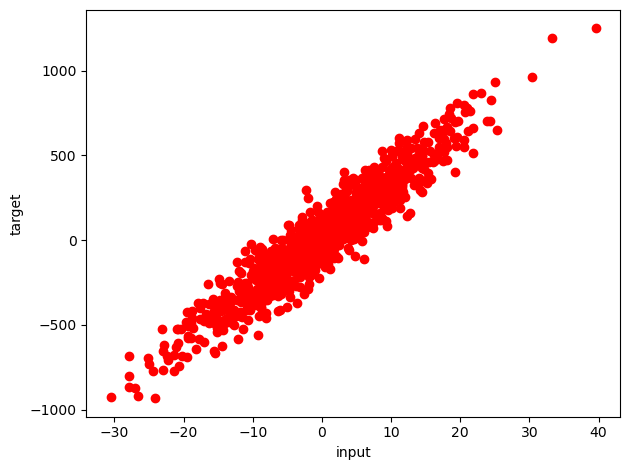

In [5]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 4: Splitting the data using train test split

The 'train_test_split'  is to divide the dataset into training and testing sets. It separates the features ('X_train' and 'X_test') and the target variable ('y_train' and 'y_test') with a 20% test size, i have considered the 80% of training set as the total number of observations are quite less

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Step 5: Fitting the model

Fit the linear regression model to the dataset

In [7]:
lin_reg=LinearRegression()
_ = lin_reg.fit(X_train,y_train) 

## Step 6: Analyze the linear regression model's performance

Visualize the linear regression model results

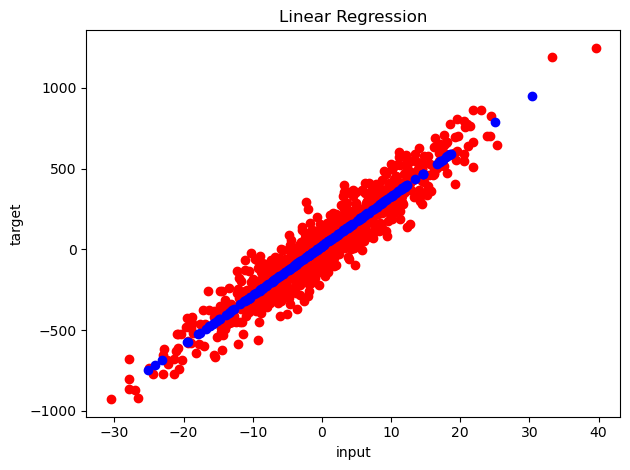

In [8]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_train, y_train, color='red')
ax.scatter(X_test, lin_reg.predict(X_test), color='blue')

ax.set_title('Linear Regression')
ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

In [9]:
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
r2 = lin_reg.score(X_test, y_test)

... using fstring formatting, we can display these values as follows...

The Root Mean Square Error for the Linear Regression has been calculated

In [10]:
print(f"Y = {b0:.2f} + {b1:.2f}x")
print(f"R^2: {lin_reg.score(X_test, y_test):.3f}") 
print(f"RMSE: {mean_squared_error(y_test, lin_reg.predict(X_test))**0.5:.2f}")
# for more on fstrings see here...
# https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

Y = 21.74 + 30.64x
R^2: 0.893
RMSE: 102.51


The Root Mean Square Error for the Linear Regression is 102.51

 SGD regressor algorithm will use the Stochastic gradient descent for the optimization,which is an iterative optimaztion algorithm that updates the parameters of the model in small batches of data.SGD is faster and better for larger datasets where as the gradient descent is more efficeint for smaller data sets.The SGD Regressor offers us the parameters that gives us flexibility to choose different combinations of penality and loss functions.

### Step 7: Applying Linear model using SGD Regressor there by fitting the model by considering Alpha - 0.01

Implementing and fitting the SGD linear regressor model by considering the maximum iterations as 100 and the eta will be controlling the step size of the each iteration which is set to 0.01.The Alpha value is the main parameter as it controls the strength of regularization and the penality is set to NONE which will specify the type of regularization to be applied.

In [11]:
sgd_reg = SGDRegressor(max_iter=100, penalty=None, eta0=0.01,alpha=0.01,random_state = 1) 
sgd_reg.fit(X_train, np.ravel(y_train))

print(f"Number of iterations = {sgd_reg.n_iter_}")



Number of iterations = 22


The number of iterations are the number the optimization algorithm took to converge where have set it to max as 100 the present model took 22 iterations to converge.

Predicting the target values there by calculating the Root Mean Square error value and printing the value of it 

In [12]:
SGD_test_pred = sgd_reg.predict(X_test)
SGD_test_rmse = np.sqrt(mean_squared_error(y_test, SGD_test_pred))
print(f"SGD  RMSE: {SGD_test_rmse:.3f}")

SGD  RMSE: 113.289


The Root Mean Square value is 113.289 for the Linear model Using the SGD Regresor.

### Step 8 : Applying Linear model using L2 and fitting the SGD Regressor with Penality as L2 (RIDGE REGRESSOR) by considering Aplha - 0.70

By setting the penality to L2 we are specifying the regularization where L2 means Ridge regression. this L2 adds a penality term to the loss function which is in proportion to the squares of the magnitude of coefficients, which helps in the prevention of overfitting of the model.we are considering the maximum number of iterations as 100 and alpha value is set to 0.70 which is  regularization strength and the eta will be controlling the step size of the each iteration which is set to 0.01.

In [13]:
sgd_reg_l2 = SGDRegressor(max_iter=100, penalty='l2', alpha = 0.70, eta0=0.01,random_state=1)
_ = sgd_reg_l2.fit(X_train, np.ravel(y_train))

print(f"Number of iterations = {sgd_reg_l2.n_iter_}")

Number of iterations = 15


The number of iterations are the number the optimization algorithm took to converge where have set it to max as 100 the present model took 15 iterations to converge.

Predicting the target values there by calculating the Root Mean Square error value and printing the value of it.

In [14]:

SGD_test_pred_l2 = sgd_reg_l2.predict(X_test)
SGD_test_rmse_l2 = np.sqrt(mean_squared_error(y_test, SGD_test_pred_l2))
print(f"SGD with l2  RMSE: {SGD_test_rmse_l2:.3f}")

SGD with l2  RMSE: 102.470


The Root Mean Square value is 102.470 for the Linear model Using the SGD Regresor with L2 

### Step 9 : Applying Linear model using L1 and fitting the SGD Regressor with Penality as L1 (Lasso Regression) by considering Aplha - 1

By setting the penality to L1 we are specifying the regularization where L1 means Lasso regression. this L1 adds a penality term to the loss function which is in proportion to the absolute values of the coefficients, which helps in the prevention of overfitting of the model.we are conidering the maximum number of iterations as 100 and alpha value is set to 1 which is the regularization strength and the eta will be controlling the step size of the each iteration which is set to 0.01.

In [15]:
sgd_reg_l1 = SGDRegressor(max_iter=100, penalty='l1', alpha = 1, eta0=0.01,random_state=1)
_ = sgd_reg_l1.fit(X_train, np.ravel(y_train))
print(f"Number of iterations = {sgd_reg_l1.n_iter_}")


Number of iterations = 22


The number of iterations are the number the optimization algorithm took to converge where have set it to max as 100 the present model took 22 iterations to converge.

Predicting the target values there by calculating the Root Mean Square error value and printing the value of it 

In [16]:
SGD_test_pred_l1 = sgd_reg_l1.predict(X_test)
SGD_test_rmse_l1 = np.sqrt(mean_squared_error(y_test, SGD_test_pred_l1))


print(f"SGD with l1  RMSE: {SGD_test_rmse_l1:.3f}")

SGD with l1  RMSE: 113.328


The Root Mean Square value is 113.328 for the Linear model Using the SGD Regresor with L1

### SUMMARY

- The Root Mean Square value of regular Linear Regression is 102.51
- The Root Mean Square value of Linear Regression using SGDRegressor is 113.289 when cosidered the alpha value as 0.01
- The Root Mean Square value of Linear Regression using SGDRegressor(L2- Ridge Regressor) is 102.470 when cosidered the alpha value as 0.70
- The Root Mean Square value of Linear Regression using SGDRegressor(L1 - Laso Regressor) is 113.328 when cosidered the alpha value as 1

By choosing the different values of alpha will considerabily affect the RMSE in a regularized linear regression models.As we know the Alpha values plays cruicial part when it comes to regularized models ie L1(Lasso) and L2(Ridge) as it controls the balance between fitting the model preventing the overfit. When used the Stochastic gradient descent with these models there by adjusting the alpha value one can achieve the fine tuning of the regularization applied. As the higher the alpha value considered ie in the Laso regressor it imposed higher regularization on the model there by reducing the risk of overfitting where the RMSE is considerably increased.whereas when the alpha value has been reduced it relaxes the regularization constraits which will allow the model to fit the data more closely there by reducing the RMSE. 

When compared to the Regular Linear regresion wit SGD regressor models the value of RMSE is quite low because in linear models there might be chances of over fitting.Also there might be other constraint like the data set size as we know that linear regression will compute the coefficients faster and give accurate results where as the SGD might still perform well as the entire data set can be processed in the memory.I have observed that when  the Alpha value is considered as  0.70 for the Ridge regression the Rmse value tends to be lower but the rmse for the alpha 1 for the Lasso regression tends to have higher number which might be a sign of under fit. When compared with the regular linear regression the rmse value is 102.51 where the Ridge regression regularization is in close proximity with lesser RMSE value.